# 10. MSMPR Crystallizer: population balance 

Let us consider an Mixed Suspension Mixed Product removal crystallizer operating at steady state at constant temperature. 
In these notes we will derive the analystical expression of the steady state particle size distribution by introducing a monodimensional population balance, and we will discuss its coupling with the material balance.
         

## 10.1 Number and number population density

Let us begin by defining $N(L)$ as the __number__ of  crystals of characteristic length $L$ per unit volume. 
The __number population density__ $n$, or in short number density, is defined as: 

\begin{equation}
\lim_{\Delta{L}\to{0}}\frac{\Delta{N(L)}}{\Delta{L}}=\frac{d{N(L)}}{d{L}}=n(L)
\label{eq:1}{\tag{1}}
\end{equation}

and represents the number of crystals of length $L$ __per unit length__, per unit volume. 
The number of crystals per unit volume with dimension comprised between $L_1$ and $L_2$ can thus be computed as a definite integral of the population density: 

\begin{equation}
N_{1,2}=\int_{L_1}^{L_2}n(L)dL
\label{eq:2}{\tag{2}}
\end{equation}

Similarly the total number of crystals is obtained as: 

\begin{equation}
N_{T}=\int_{0}^{\infty}n(L)dL
\label{eq:3}{\tag{3}}
\end{equation}

## 10.2 Population Balance in an MSMPR crystallizer

Let us write a steady state population balance for particles with size comprised between $L_1$ and $L_2$. 

\begin{equation}
{\Delta{N}}V=n_1G_1V\Delta{t}-n_2G_2V\Delta{t}-Q\overline{n}\Delta{L}\Delta{t}
\label{eq:4}{\tag{4}}
\end{equation}

where $\Delta{N}V$ is the change in the number of particles within the length interval $\Delta{L}=L_2-L_1$ per unit volume, accumulated in time $\Delta{t}$. 
The term $n_1G_1V\Delta{t}$ captures the number of crystals that outgrow length $L_1$ in time $\Delta{t}$, where $G_1$ is the growth rate of particles of length $L_1$, $V$ is the total volume. 
Similarly, the term $n_2G_2V\Delta{t}$ takes into account particles leaving the length  interval $\Delta{L}$, outgrowing length $L_2$. 
Finally the term $Q\overline{n}\Delta{L}\Delta{t}$ accounts for the removal of particles with size comprised in  $\Delta{L}$ from the crystalliser due to the magma flowrate with volumetric flowrate $Q$, where $\overline{n}$ represents the average population density within the length interval $\Delta{L}$.  

Eq. \eqref{eq:4} can be rearranged to obtain on the left side a discrete accumulation term, i.e. the number of particles with size compriused in $\delta{L}$ accumulated in time $\Delta{t}$:

\begin{equation}
\frac{\Delta{N}}{\Delta{t}}=n_1G_1-n_2G_2-\frac{Q}{V}\overline{n}\Delta{L}
\label{eq:5}{\tag{5}}
\end{equation}

At steady state there is no accumulation and Eq. \eqref{eq:5} can be rewritten as:

\begin{equation}
\frac{n_2G_2-n_1G_1}{\Delta{L}}=-\frac{Q}{V}\overline{n}
\label{eq:6}{\tag{6}}
\end{equation}

Noting that the residence time $\tau=V/Q$, and taking the limit for $\Delta{L}\rightarrow{0}$ we get: 
\begin{equation}
\frac{dn}{dL}=\frac{n}{G\tau}
\label{eq:7}{\tag{7}}
\end{equation}

Whic can be solved analytically, yielding the steady state number population density n(L): 

\begin{equation}
n(L)=n_0\exp\left(-\frac{L}{G\tau}\right)
\label{eq:8}{\tag{8}}
\end{equation}

where $n_0$ is an integration constant, determined from the boundary conditions, that has the phisical meaning of population density of nuclei in the crystallizer at steady state. 

In this formulation of the population balance we consider particles to be born as nuclei at length $L=0$. 
The nucleation rate $J$, i.e. the number of nuclei generated per unit time per unit volume can be written as: 

\begin{equation}
J={\frac{dN}{dt}}\vert_{L=0}
\label{eq:9}{\tag{9}}
\end{equation}

by applying the chain rule we can rewrite the nucleation rate as: 

\begin{equation}
J=\frac{dN}{dL}\vert_{L=0}\frac{dL}{dt}\vert_{L=0}=n_0G
\label{eq:10}{\tag{10}}
\end{equation}

where, by definition $\frac{dN}{dL}\vert_{L=0}=n_0$, and $\frac{dL}{dt}=G$. We shall note that here we are considering the growth rate to be independent from the crystal size. 

This expression allows us to determine the integration constant $n_0$ based on characteristic rates of crystal nucleation and growth, yielding:

\begin{equation}
n_0=\frac{J}{G}
\label{eq:11}{\tag{11}}
\end{equation}

## 10.3 Particle size distribution and process parameters: $\tau$, $G$, $J$

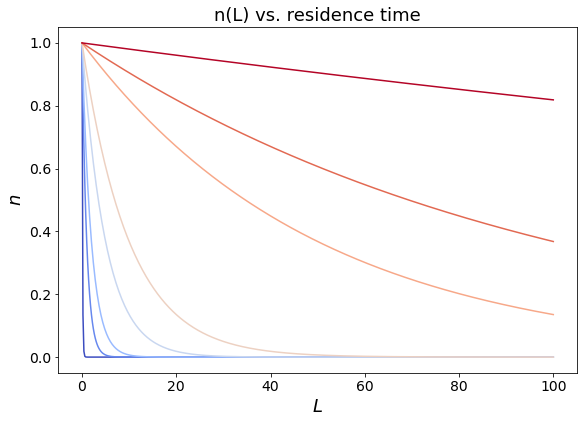

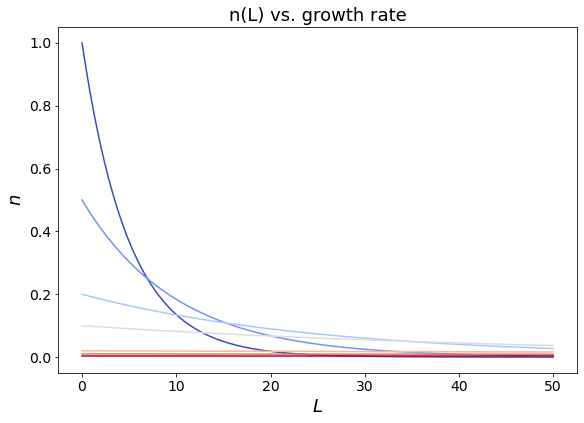

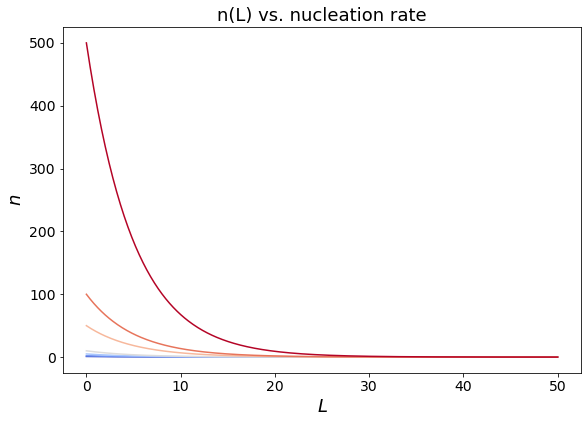

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Data
G=1
J=1
tau=np.array([0.1, 1, 2, 5, 10, 50, 100, 500]);
N = 500 #number of points
L = np.linspace(0,100, N)

color=iter(cm.coolwarm(np.linspace(0,1,np.size(tau))))

for i in range(0,np.size(tau)):     
    c=next(color)
    n= J / G * np.exp(-L/G/tau[i])
    axes.plot(L,n, marker=' ' , c=c)    
    
plt.title('n(L) vs. residence time', fontsize=18);
axes.set_xlabel('$L$', fontsize=18);
axes.set_ylabel('$n$',fontsize=18);

#########################################################
# Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Data
G=np.array([1, 2, 5, 10, 50, 100, 500]);
J=1;
tau=5;
N = 500 #number of points
L = np.linspace(0,50, N);

color=iter(cm.coolwarm(np.linspace(0,1,np.size(G))));

for i in range(0,np.size(G)):     
    c=next(color)
    n= J / G[i] * np.exp(-L/G[i]/tau)
    axes.plot(L,n, marker=' ' , c=c)    
    
plt.title('n(L) vs. growth rate', fontsize=18);
axes.set_xlabel('$L$', fontsize=18);
axes.set_ylabel('$n$',fontsize=18);


#########################################################
# Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Data
G=1;
J=np.array([1, 2, 5, 10, 50, 100, 500]);
tau=5;
N = 500 #number of points
L = np.linspace(0,50, N);

color=iter(cm.coolwarm(np.linspace(0,1,np.size(J))));

for i in range(0,np.size(J)):     
    c=next(color)
    n= J[i] / G * np.exp(-L/G/tau)
    axes.plot(L,n, marker=' ' , c=c)    
    
plt.title('n(L) vs. nucleation rate', fontsize=18);
axes.set_xlabel('$L$', fontsize=18);
axes.set_ylabel('$n$',fontsize=18);


## 10.4 Moments of the PSD in a MSMPR crystallizer

The number population density $n(L)$ can be used to derive other properties of the population of particles through the calculation of the moments of the distribution. 
The $i^{th}$ order moment of the number population density is defined as: 

\begin{equation}
m_i=\int_0^{\infty}L^indL
\label{eq:12}{\tag{12}}
\end{equation}

Based on this definition we note that the moments from order 0 to 3 have a well defined physical meaning: 

- $m_0=\int_0^{\infty}L^0ndL=N_L$ represents the number of particles with size smaller or equal than size L. For $L\rightarrow{\infty}$ $N_L$ tends to the total number of particles in the crystallizer: 
\begin{equation}
N_T=n_0G\tau
\label{eq:13}{\tag{13}}
\end{equation}

- $m_1=\int_0^{\infty}L^1ndL=\mathcal{L}$ represents the total length of particles with size smaller or equal than size L. For $L\rightarrow{\infty}$ $\mathcal{L}$ tends to the total length of particles in the crystallizer: 
\begin{equation}
\mathcal{L}_T=n_0(G\tau)^2
\label{eq:14}{\tag{14}}
\end{equation} 

- $m_2=\int_0^{\infty}L^2ndL\propto{A}$ is proportional to the total area of particles with size smaller or equal than size L. For $L\rightarrow{\infty}$ $A$ tends to the total area of the particles contained in the crystallizer:  
\begin{equation}
A_T=2{\beta}n_0(G\tau)^3
\label{eq:15}{\tag{15}}
\end{equation} 
where $\beta$ is the surface shape factor of the particles. 

- $m_3=\int_0^{\infty}L^2ndL\propto{V}$ is proportional to the total volume of particles with size smaller or equal than size L. For $L\rightarrow{\infty}$ $V$ tends to the total volume of the particles contained in the crystallizer: 
\begin{equation}
V_T=6{\alpha}n_0(G\tau)^3
\label{eq:16}{\tag{16}}
\end{equation}
where $\alpha$ is the volumetric shape factor of the particles.


It should be noted that the total volume of the particles allows to compute the total mass of particles in the system: 
\begin{equation}
M_T=\rho_c{V_T}=6\rho_c{\alpha}n_0(G\tau)^3
\label{eq:17}{\tag{17}}
\end{equation}
where $\rho_c$ is the density of the crystalline phase. 

This expression for $M_T$ allows to couple the population balance and the gobal material balance in an MSMPR crystallizer since $M_T=C_{in}-C_{out}$, where $C_{in}$ and $C_{out}$ are the inlet and outlet concentrations of solute in the liquid phase. 
 

## 10.5 Adimensional Mass distribution and dominant crystal size

In order to obtain a general relationship between the crystallization process and an average indicator of the crystalline particles size obtained in an MSMPR crystallizer it is convenient to write the cumulative mass distribution in a dimensionless form. To this aim we introduce the dimensionless length $x=L/G\tau$, where $G$ is the growth rate and $\tau$ is the residence time. 

The cumulative mass distribution can thus be written as: 

\begin{equation}
M(x)=\frac{M}{M_T}=\frac{\int_0^{x}x^3\exp(-x)dx}{\int_0^{\infty}x^3\exp(-x)dx}=1-\left(1+x+\frac{1}{2}x^2+\frac{1}{6}x^3\right)\exp(-x)
\label{eq:18}{\tag{18}}
\end{equation}

The corresponding mass population density is computed differentiating $M(x)$with respect to $x$: 

\begin{equation}
m(x)=\frac{dM(x)}{dx}=\frac{1}{6}x^3\exp(-x)
\label{eq:19}{\tag{19}}
\end{equation}

The mass-based population density m(x) has a maximum for $x=3$, hence the most probable - often referred to as the modal or dominant particle size can be computed as: 

\begin{equation}
L_D=3G\tau
\label{eq:20}{\tag{20}}
\end{equation}

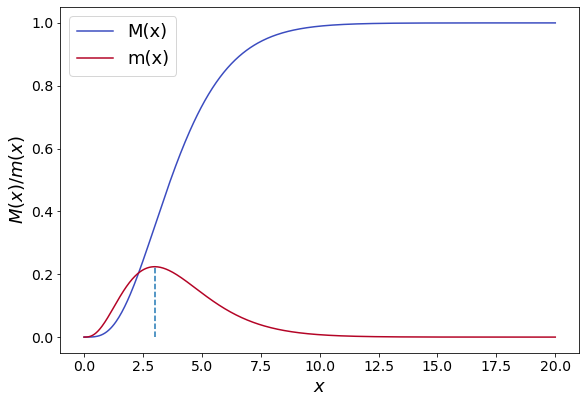

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Data
x = np.linspace(0,20, N)

color=iter(cm.coolwarm(np.linspace(0,1,2)))
  
c=next(color)
M=1-(1+x+0.5*np.power(x,2)+1/6*np.power(x,3))*np.exp(-x)
axes.plot(x,M, marker=' ' , c=c) 
c=next(color)
m=1/6*np.power(x,3)*np.exp(-x)
axes.plot(x,m, marker=' ' , c=c)    
axes.plot(np.array([3,3]),np.array([0, 1/6*np.power(3,3)*np.exp(-3)]),'--',)

axes.set_xlabel('$x$', fontsize=18);
axes.set_ylabel('$M(x)/m(x)$',fontsize=18);
axes.legend(['M(x)','m(x)'], fontsize=18);